# Wisconsin Breast Cancer Classification

2/10/22

Max Rivera

Dataset from https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

## Exploratory Data Analysis

In [2]:
# load dataset 

In [3]:
df = pd.read_csv('data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


There is an unnamed column that needs to be removed.

In [4]:
# drop unnamed column 
df = df.dropna(axis=1)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


The 'id' column doesn't provide any useful information about the tumor, so it needs to be removed. 

In [5]:
# remove 'id' column
df = df.drop('id',axis=1)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


For binary classification purposes, the 'diagnosis' column should be in the form of 0 or 1 instead of M or B. 

In [6]:
df['diagnosis'] = np.array([1 if i == 'M' else 0 for i in df['diagnosis']])
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Now let's look at the distribution of classes:

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

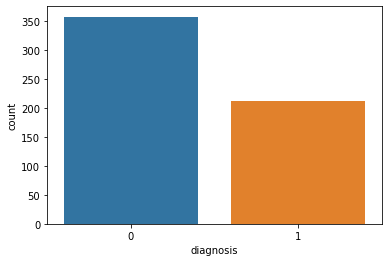

In [7]:
sns.countplot(x='diagnosis',data=df)

The distribution of classes is good enough to use metrics such as classification. 

<AxesSubplot:>

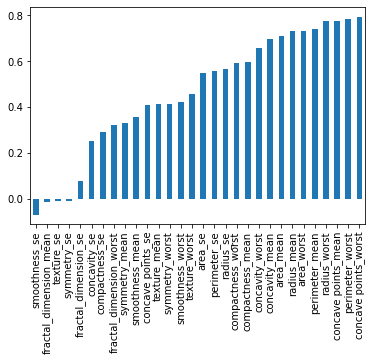

In [8]:
# correlation of each feature with the classes
df.corr()['diagnosis'][1:].sort_values().plot(kind='bar')

Most features are correlate with the output classes. There are a few features which do not. But for the first iteration of the model they can remain.

## Train Test Split

The train test split will be 70-30, since the dataset is pretty small (only 567 samples)

In [9]:
X = df.drop('diagnosis',axis=1).values
X.shape

(569, 30)

In [10]:
y = df['diagnosis'].values
y.shape

(569,)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

## Normalization

In [12]:
scaler = MinMaxScaler()

In [13]:
# each feature is scaled between 0 and 1
scaler.fit(X_train)
X_train = scaler.transform(X_train)

The scaler is only fit on the training data, because we don't want to look at our test data at all or we won't have an unbiased evaluation. 

In [14]:
# show statistics for X_train
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,...,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,0.344445,0.325166,0.331635,0.213454,0.474382,0.259045,0.208312,0.239318,0.380789,0.276509,...,0.292528,0.369829,0.279342,0.168791,0.406416,0.221953,0.220572,0.393164,0.265500,0.195060
std,0.175694,0.148126,0.172713,0.151680,0.152889,0.162484,0.192375,0.194286,0.137436,0.152144,...,0.176238,0.167026,0.171036,0.145152,0.150028,0.153445,0.173869,0.230207,0.123448,0.121759
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.221708,0.215759,0.211446,0.111029,0.356169,0.138718,0.063894,0.097614,0.288889,0.174126,...,0.173693,0.244203,0.162794,0.076251,0.300337,0.112651,0.086861,0.219536,0.186120,0.114568
50%,0.304761,0.310619,0.293585,0.167678,0.473716,0.228989,0.140745,0.161556,0.369697,0.250527,...,0.245998,0.355943,0.232930,0.120367,0.405996,0.180177,0.179233,0.335601,0.248127,0.167936
75%,0.427810,0.411481,0.417581,0.262185,0.569892,0.340455,0.308341,0.361096,0.453662,0.347883,...,0.376201,0.486474,0.371358,0.210517,0.494651,0.308001,0.310144,0.567354,0.316000,0.247948
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Each feature of X_train is normalized so that the max value is 1 and the min value is 0. 

In [15]:
X_test = scaler.transform(X_test)

## Initialize Model

In [16]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

## Train Model

In [17]:
model.fit(x=X_train,y=y_train, epochs=600,validation_data=(X_test,y_test))

2022-02-10 14:20:48.037141: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-10 14:20:48.037588: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Train on 398 samples, validate on 171 samples
Epoch 1/600
398/398 [==============================] - 1s 2ms/sample - loss: 0.6782 - val_loss: 0.6637
Epoch 2/600
398/398 [==============================] - 0s 106us/sample - loss: 0.6464 - val_loss: 0.6361
Epoch 3/600
398/398 [==============================] - 0s 107us/sample - loss: 0.6118 - val_loss: 0.6039
Epoch 4/600
398/398 [==============================] - 0s 106us/sample - loss: 0.5723 - val_loss: 0.5644
Epoch 5/600
398/398 [==============================] - 0s 108us/sample - loss: 0.5282 - val_loss: 0.5184
Epoch 6/600
398/398 [==============================] - 0s 107us/sample - loss: 0.4792 - val_loss: 0.4710
Epoch 7/600
398/398 [==============================] - 0s 106us/sample - loss: 0.4325 - val_loss: 0.4248
Epoch 8/600
398/398 [==============================] - 0s 105us/sample - loss: 0.3860 - val_loss: 0.3824
Epoch 9/600
398/398 [==============================] - 0s 105us/sample - loss: 0.3428 - val_loss: 0.3456
Epoch 10/60

Epoch 78/600
398/398 [==============================] - 0s 103us/sample - loss: 0.0389 - val_loss: 0.1255
Epoch 79/600
398/398 [==============================] - 0s 100us/sample - loss: 0.0395 - val_loss: 0.1252
Epoch 80/600
398/398 [==============================] - 0s 100us/sample - loss: 0.0388 - val_loss: 0.1250
Epoch 81/600
398/398 [==============================] - 0s 100us/sample - loss: 0.0389 - val_loss: 0.1240
Epoch 82/600
398/398 [==============================] - 0s 98us/sample - loss: 0.0391 - val_loss: 0.1256
Epoch 83/600
398/398 [==============================] - 0s 99us/sample - loss: 0.0379 - val_loss: 0.1252
Epoch 84/600
398/398 [==============================] - 0s 101us/sample - loss: 0.0402 - val_loss: 0.1251
Epoch 85/600
398/398 [==============================] - 0s 98us/sample - loss: 0.0378 - val_loss: 0.1259
Epoch 86/600
398/398 [==============================] - 0s 103us/sample - loss: 0.0395 - val_loss: 0.1256
Epoch 87/600
398/398 [===========================

Epoch 155/600
398/398 [==============================] - 0s 102us/sample - loss: 0.0252 - val_loss: 0.1335
Epoch 156/600
398/398 [==============================] - 0s 100us/sample - loss: 0.0271 - val_loss: 0.1353
Epoch 157/600
398/398 [==============================] - 0s 100us/sample - loss: 0.0251 - val_loss: 0.1355
Epoch 158/600
398/398 [==============================] - 0s 99us/sample - loss: 0.0247 - val_loss: 0.1329
Epoch 159/600
398/398 [==============================] - 0s 100us/sample - loss: 0.0259 - val_loss: 0.1356
Epoch 160/600
398/398 [==============================] - 0s 98us/sample - loss: 0.0250 - val_loss: 0.1369
Epoch 161/600
398/398 [==============================] - 0s 100us/sample - loss: 0.0248 - val_loss: 0.1356
Epoch 162/600
398/398 [==============================] - 0s 100us/sample - loss: 0.0246 - val_loss: 0.1369
Epoch 163/600
398/398 [==============================] - 0s 101us/sample - loss: 0.0244 - val_loss: 0.1376
Epoch 164/600
398/398 [================

398/398 [==============================] - 0s 103us/sample - loss: 0.0171 - val_loss: 0.1451
Epoch 232/600
398/398 [==============================] - 0s 102us/sample - loss: 0.0168 - val_loss: 0.1443
Epoch 233/600
398/398 [==============================] - 0s 100us/sample - loss: 0.0168 - val_loss: 0.1431
Epoch 234/600
398/398 [==============================] - 0s 99us/sample - loss: 0.0169 - val_loss: 0.1519
Epoch 235/600
398/398 [==============================] - 0s 100us/sample - loss: 0.0160 - val_loss: 0.1463
Epoch 236/600
398/398 [==============================] - 0s 99us/sample - loss: 0.0191 - val_loss: 0.1527
Epoch 237/600
398/398 [==============================] - 0s 99us/sample - loss: 0.0200 - val_loss: 0.1453
Epoch 238/600
398/398 [==============================] - 0s 100us/sample - loss: 0.0160 - val_loss: 0.1460
Epoch 239/600
398/398 [==============================] - 0s 100us/sample - loss: 0.0149 - val_loss: 0.1458
Epoch 240/600
398/398 [==============================]

398/398 [==============================] - 0s 106us/sample - loss: 0.0096 - val_loss: 0.1702
Epoch 308/600
398/398 [==============================] - 0s 105us/sample - loss: 0.0105 - val_loss: 0.1695
Epoch 309/600
398/398 [==============================] - 0s 101us/sample - loss: 0.0108 - val_loss: 0.1725
Epoch 310/600
398/398 [==============================] - 0s 100us/sample - loss: 0.0114 - val_loss: 0.1724
Epoch 311/600
398/398 [==============================] - 0s 100us/sample - loss: 0.0159 - val_loss: 0.1847
Epoch 312/600
398/398 [==============================] - 0s 100us/sample - loss: 0.0147 - val_loss: 0.1791
Epoch 313/600
398/398 [==============================] - 0s 101us/sample - loss: 0.0136 - val_loss: 0.1652
Epoch 314/600
398/398 [==============================] - 0s 101us/sample - loss: 0.0094 - val_loss: 0.1650
Epoch 315/600
398/398 [==============================] - 0s 101us/sample - loss: 0.0088 - val_loss: 0.1669
Epoch 316/600
398/398 [============================

398/398 [==============================] - 0s 103us/sample - loss: 0.0056 - val_loss: 0.2023
Epoch 384/600
398/398 [==============================] - 0s 104us/sample - loss: 0.0060 - val_loss: 0.2040
Epoch 385/600
398/398 [==============================] - 0s 104us/sample - loss: 0.0056 - val_loss: 0.2059
Epoch 386/600
398/398 [==============================] - 0s 102us/sample - loss: 0.0059 - val_loss: 0.2042
Epoch 387/600
398/398 [==============================] - 0s 99us/sample - loss: 0.0051 - val_loss: 0.2109
Epoch 388/600
398/398 [==============================] - 0s 100us/sample - loss: 0.0070 - val_loss: 0.2062
Epoch 389/600
398/398 [==============================] - 0s 101us/sample - loss: 0.0053 - val_loss: 0.2063
Epoch 390/600
398/398 [==============================] - 0s 100us/sample - loss: 0.0054 - val_loss: 0.2064
Epoch 391/600
398/398 [==============================] - 0s 100us/sample - loss: 0.0055 - val_loss: 0.2088
Epoch 392/600
398/398 [=============================

398/398 [==============================] - 0s 107us/sample - loss: 0.0055 - val_loss: 0.2548
Epoch 460/600
398/398 [==============================] - 0s 104us/sample - loss: 0.0046 - val_loss: 0.2467
Epoch 461/600
398/398 [==============================] - 0s 103us/sample - loss: 0.0033 - val_loss: 0.2578
Epoch 462/600
398/398 [==============================] - 0s 101us/sample - loss: 0.0036 - val_loss: 0.2539
Epoch 463/600
398/398 [==============================] - 0s 103us/sample - loss: 0.0033 - val_loss: 0.2553
Epoch 464/600
398/398 [==============================] - 0s 100us/sample - loss: 0.0040 - val_loss: 0.2520
Epoch 465/600
398/398 [==============================] - 0s 110us/sample - loss: 0.0032 - val_loss: 0.2563
Epoch 466/600
398/398 [==============================] - 0s 104us/sample - loss: 0.0032 - val_loss: 0.2525
Epoch 467/600
398/398 [==============================] - 0s 101us/sample - loss: 0.0033 - val_loss: 0.2514
Epoch 468/600
398/398 [============================

398/398 [==============================] - 0s 107us/sample - loss: 0.0024 - val_loss: 0.3000
Epoch 536/600
398/398 [==============================] - 0s 105us/sample - loss: 0.0019 - val_loss: 0.2927
Epoch 537/600
398/398 [==============================] - 0s 102us/sample - loss: 0.0023 - val_loss: 0.3025
Epoch 538/600
398/398 [==============================] - 0s 99us/sample - loss: 0.0024 - val_loss: 0.2904
Epoch 539/600
398/398 [==============================] - 0s 101us/sample - loss: 0.0025 - val_loss: 0.2932
Epoch 540/600
398/398 [==============================] - 0s 100us/sample - loss: 0.0024 - val_loss: 0.2965
Epoch 541/600
398/398 [==============================] - 0s 101us/sample - loss: 0.0029 - val_loss: 0.2930
Epoch 542/600
398/398 [==============================] - 0s 100us/sample - loss: 0.0029 - val_loss: 0.3053
Epoch 543/600
398/398 [==============================] - 0s 101us/sample - loss: 0.0032 - val_loss: 0.2988
Epoch 544/600
398/398 [=============================

<AxesSubplot:>

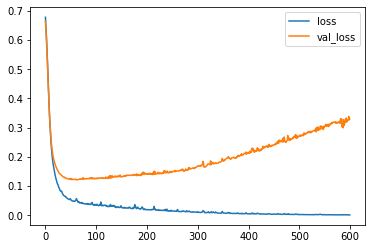

In [18]:
# plot the training and validation loss
loss = pd.DataFrame(model.history.history)
loss.plot()

The Validation set error starts to increase at a certain number of epochs, even as training error continues to decrease. At the end of training, the validation error is higher than training, an indication of overfitting. This can be mitigated by several techniques, such as Early Stopping and Dropout Regularization. First, Early Stopping will be added to the model.  

In [19]:
# redefine model with early stopping callback 
# monitor = what we are trying to monitor (validation loss)
# mode = what we are trying to do to our value (minimize)
# verbose = whether or not we want a report printed (1)
# patience = the number of epochs we wait after criteria is met before stopping (25)
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1, patience=25)

model2 = Sequential()

model2.add(Dense(30,activation='relu'))
model2.add(Dense(15,activation='relu'))
model2.add(Dense(1,activation='sigmoid'))

model2.compile(loss='binary_crossentropy',optimizer='adam')

In [20]:
# retrain model using early stopping
model2.fit(x=X_train,y=y_train,epochs=600, validation_data=(X_test,y_test),callbacks=[early_stop])

Train on 398 samples, validate on 171 samples
Epoch 1/600
398/398 [==============================] - 1s 1ms/sample - loss: 0.6890 - val_loss: 0.6762
Epoch 2/600
398/398 [==============================] - 0s 106us/sample - loss: 0.6609 - val_loss: 0.6500
Epoch 3/600
398/398 [==============================] - 0s 109us/sample - loss: 0.6347 - val_loss: 0.6238
Epoch 4/600
398/398 [==============================] - 0s 106us/sample - loss: 0.6054 - val_loss: 0.5905
Epoch 5/600
398/398 [==============================] - 0s 107us/sample - loss: 0.5640 - val_loss: 0.5471
Epoch 6/600
398/398 [==============================] - 0s 106us/sample - loss: 0.5176 - val_loss: 0.5023
Epoch 7/600
398/398 [==============================] - 0s 105us/sample - loss: 0.4694 - val_loss: 0.4586
Epoch 8/600
398/398 [==============================] - 0s 106us/sample - loss: 0.4210 - val_loss: 0.4136
Epoch 9/600
398/398 [==============================] - 0s 107us/sample - loss: 0.3778 - val_loss: 0.3739
Epoch 10/60

Epoch 78/600
398/398 [==============================] - 0s 105us/sample - loss: 0.0433 - val_loss: 0.1336
Epoch 79/600
398/398 [==============================] - 0s 102us/sample - loss: 0.0434 - val_loss: 0.1334
Epoch 80/600
398/398 [==============================] - 0s 100us/sample - loss: 0.0433 - val_loss: 0.1347
Epoch 81/600
398/398 [==============================] - 0s 101us/sample - loss: 0.0411 - val_loss: 0.1348
Epoch 82/600
398/398 [==============================] - 0s 101us/sample - loss: 0.0413 - val_loss: 0.1346
Epoch 83/600
398/398 [==============================] - 0s 102us/sample - loss: 0.0415 - val_loss: 0.1355
Epoch 84/600
398/398 [==============================] - 0s 101us/sample - loss: 0.0434 - val_loss: 0.1355
Epoch 85/600
398/398 [==============================] - 0s 102us/sample - loss: 0.0413 - val_loss: 0.1349
Epoch 86/600
398/398 [==============================] - 0s 101us/sample - loss: 0.0393 - val_loss: 0.1351
Epoch 87/600
398/398 [========================

<AxesSubplot:>

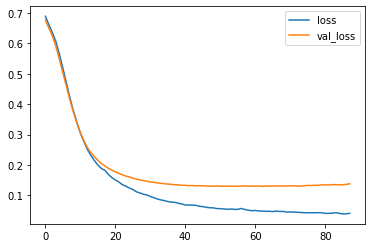

In [21]:
# plot losses with early stopping
loss = pd.DataFrame(model2.history.history)
loss.plot()

There was a noticeable improvement with Early Stopping. The Validation loss does not increase at all, so overfitting is reduced. There is still a noticeable difference between the validation and training loss, which can be further reduced through other regularization techniques, such as Dropout Regularization.

In [22]:
# retrain model with dropout regularization
model3 = Sequential()

model3.add(Dense(30,activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(15,activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(1,activation='sigmoid'))

model3.compile(loss='binary_crossentropy',optimizer='adam')

In [23]:
model3.fit(x=X_train, y=y_train, epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Train on 398 samples, validate on 171 samples
Epoch 1/600
398/398 [==============================] - 1s 1ms/sample - loss: 0.6911 - val_loss: 0.6772
Epoch 2/600
398/398 [==============================] - 0s 113us/sample - loss: 0.6758 - val_loss: 0.6641
Epoch 3/600
398/398 [==============================] - 0s 116us/sample - loss: 0.6600 - val_loss: 0.6520
Epoch 4/600
398/398 [==============================] - 0s 113us/sample - loss: 0.6398 - val_loss: 0.6327
Epoch 5/600
398/398 [==============================] - 0s 115us/sample - loss: 0.6304 - val_loss: 0.6122
Epoch 6/600
398/398 [==============================] - 0s 114us/sample - loss: 0.6086 - val_loss: 0.5869
Epoch 7/600
398/398 [==============================] - 0s 114us/sample - loss: 0.5970 - val_loss: 0.5540
Epoch 8/600
398/398 [==============================] - 0s 114us/sample - loss: 0.5800 - val_loss: 0.5183
Epoch 9/600
398/398 [==============================] - 0s 115us/sample - loss: 0.5427 - val_loss: 0.4825
Epoch 10/60

Epoch 78/600
398/398 [==============================] - 0s 111us/sample - loss: 0.0976 - val_loss: 0.1117
Epoch 79/600
398/398 [==============================] - 0s 109us/sample - loss: 0.0771 - val_loss: 0.1075
Epoch 80/600
398/398 [==============================] - 0s 107us/sample - loss: 0.1114 - val_loss: 0.1120
Epoch 81/600
398/398 [==============================] - 0s 107us/sample - loss: 0.0837 - val_loss: 0.1096
Epoch 82/600
398/398 [==============================] - 0s 108us/sample - loss: 0.1056 - val_loss: 0.1052
Epoch 83/600
398/398 [==============================] - 0s 109us/sample - loss: 0.0948 - val_loss: 0.1050
Epoch 84/600
398/398 [==============================] - 0s 109us/sample - loss: 0.1224 - val_loss: 0.1116
Epoch 85/600
398/398 [==============================] - 0s 108us/sample - loss: 0.1132 - val_loss: 0.1038
Epoch 86/600
398/398 [==============================] - 0s 109us/sample - loss: 0.1047 - val_loss: 0.1030
Epoch 87/600
398/398 [========================

<AxesSubplot:>

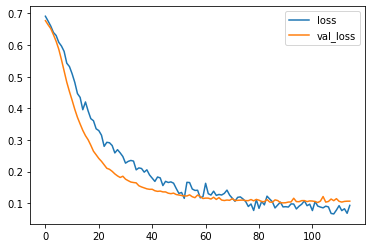

In [24]:
# plot the losses
loss = pd.DataFrame(model3.history.history)
loss.plot()

By adding dropout regularization to the model, validation loss is now much closer to training loss. Overfitting has been minimized. 

## Model Evaluation

For classification problems, the confusion matrix will useful as well as the accuracy metric. 

In [25]:
# use model to predict on test data 
predictions = model3.predict_classes(X_test)

In [26]:
# generate confusion matrix and accuracy score 
print(confusion_matrix(y_test, predictions))

[[103   2]
 [  3  63]]


In [27]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       105
           1       0.97      0.95      0.96        66

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



The final model achieved an accuracy of 97% at classifying tumors as benign or malignant. Early Stopping and Dropout Regularization proved to be effective tools at minimizing overfitting. Since the test set was used as validation during Early Stopping, the final evaluation of the model is biased. To get an unbiased evaluation of this model, an actual validation set needs to be utilized. Additionally, model hyperparameters should be tuned on the validation set before evaluation on the test set.